# Read Data Sample

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",15)
%matplotlib inline
#%pdb

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "x"]

kdd_train = pd.read_csv("dataset/KDDTrain+.txt",names = col_names,)
kdd_test = pd.read_csv("dataset/KDDTest+.txt",names = col_names,)

kdd_train = kdd_train.drop("x", axis = 1)
kdd_test = kdd_test.drop("x", axis = 1)


In [3]:
category_variables = ["protocol_type","service","flag"]
for cv in category_variables:
    kdd_train[cv] = kdd_train[cv].astype("category")
kdd_train["label"] = kdd_train["label"].astype("category")

In [4]:
kdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125966,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125967,0,tcp,http,SF,359,375,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal


In [5]:
kdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
kdd_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
kdd_train.label

0          normal
1          normal
2         neptune
3          normal
4          normal
5         neptune
6         neptune
           ...   
125966    neptune
125967     normal
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: label, dtype: category
Categories (23, object): [back, buffer_overflow, ftp_write, guess_passwd, ..., spy, teardrop, warezclient, warezmaster]

In [8]:
sess_types = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

is_sess = {
    "DoS":"Attack",
    "R2L":"Attack",
    "U2R":"Attack",
    "Probe":"Attack",
    "normal":"Normal"
}

In [9]:
kdd_train["sess_type"] = kdd_train.label.map(lambda x: sess_types[x])
kdd_train["is_sess"] = kdd_train.sess_type.map(lambda x: is_sess[x])
kdd_test["sess_type"] = kdd_train.label.map(lambda x: sess_types[x])
kdd_test["is_sess"] = kdd_train.sess_type.map(lambda x: is_sess[x])

In [10]:
kdd_sess_type_group = kdd_train.groupby("sess_type")
kdd_is_sess_group = kdd_train.groupby("is_sess")

In [11]:
kdd_sess_type_group.is_sess.count()

sess_type
DoS       45927
Probe     11656
R2L         995
U2R          52
normal    67343
Name: is_sess, dtype: int64

In [12]:
kdd_is_sess_group.sess_type.count()

is_sess
Attack    58630
Normal    67343
Name: sess_type, dtype: int64

In [13]:
kdd_sess_type_group.describe()

count  diff_srv_rate     dst_bytes  dst_host_count  \
sess_type                                                                    
DoS       count  45927.000000   45927.000000  4.592700e+04    45927.000000   
          mean     178.090034       0.065403  1.692015e+02      244.600475   
          std      104.445748       0.064023  1.168004e+03       41.324475   
          min        1.000000       0.000000  0.000000e+00        1.000000   
          25%      109.000000       0.050000  0.000000e+00      255.000000   
          50%      172.000000       0.060000  0.000000e+00      255.000000   
          75%      249.000000       0.070000  0.000000e+00      255.000000   
...                       ...            ...           ...             ...   
normal    mean      22.517945       0.028788  4.329685e+03      147.431923   
          std       54.026086       0.145622  6.546282e+04      101.785400   
          min        0.000000       0.000000  0.000000e+00        0.000000   
          25%        1.000000       0.000000  1.050000e+02       40.000000   
          50%        4.000000       0.000000  3.790000e+02      156.000000   
          75%       14.000000       0.000000  2.056000e+03      255.000000   
          max      511.000000       1.000000  7.028652e+06      255.000000   

                 dst_host_diff_srv_rate  dst_host_rerror_rate  \
sess_type                                                       
DoS       count            45927.000000          45927.000000   
          mean                 0.066333              0.157569   
          std                  0.058079              0.358934   
          min                  0.000000              0.000000   
          25%                  0.050000              0.000000   
          50%                  0.070000              0.000000   
          75%                  0.070000              0.000000   
...                                 ...                   ...   
normal    mean                 0.040134              0.046589   
          std                  0.128529              0.195306   
          min                  0.000000              0.000000   
          25%                  0.000000              0.000000   
          50%                  0.000000              0.000000   
          75%                  0.020000              0.000000   
          max                  1.000000              1.000000   

                 dst_host_same_src_port_rate  dst_host_same_srv_rate  \
sess_type                                                              
DoS       count                 45927.000000            45927.000000   
          mean                      0.049492                0.123423   
          std                       0.188947                0.228287   
          min                       0.000000                0.000000   
          25%                       0.000000                0.020000   
          50%                       0.000000                0.050000   
          75%                       0.000000                0.080000   
...                                      ...                     ...   
normal    mean                      0.121726                0.811875   
          std                       0.254382                0.324091   
          min                       0.000000                0.000000   
          25%                       0.000000                0.750000   
          50%                       0.010000                1.000000   
          75%                       0.080000                1.000000   
          max                       1.000000                1.000000   

                 dst_host_serror_rate  dst_host_srv_count       ...        \
sess_type                                                       ...         
DoS       count          45927.000000        45927.000000       ...         
          mean               0.747922           26.524005       ...         
          std                0.431707           48.303117 

In [14]:
kdd_is_sess_group.describe()

count  diff_srv_rate     dst_bytes  dst_host_count  \
is_sess                                                                    
Attack  count  58630.000000   58630.000000  5.863000e+04    58630.000000   
        mean     154.849991       0.102410  3.752448e+04      222.025260   
        std      124.334483       0.206408  5.893991e+06       79.196259   
        min        0.000000       0.000000  0.000000e+00        1.000000   
        25%       40.000000       0.050000  0.000000e+00      255.000000   
        50%      138.000000       0.060000  0.000000e+00      255.000000   
        75%      241.000000       0.070000  0.000000e+00      255.000000   
...                     ...            ...           ...             ...   
Normal  mean      22.517945       0.028788  4.329685e+03      147.431923   
        std       54.026086       0.145622  6.546282e+04      101.785400   
        min        0.000000       0.000000  0.000000e+00        0.000000   
        25%        1.000000       0.000000  1.050000e+02       40.000000   
        50%        4.000000       0.000000  3.790000e+02      156.000000   
        75%       14.000000       0.000000  2.056000e+03      255.000000   
        max      511.000000       1.000000  7.028652e+06      255.000000   

               dst_host_diff_srv_rate  dst_host_rerror_rate  \
is_sess                                                       
Attack  count            58630.000000          58630.000000   
        mean                 0.132131              0.201810   
        std                  0.230626              0.381090   
        min                  0.000000              0.000000   
        25%                  0.050000              0.000000   
        50%                  0.070000              0.000000   
        75%                  0.080000              0.020000   
...                               ...                   ...   
Normal  mean                 0.040134              0.046589   
        std                  0.128529              0.195306   
        min                  0.000000              0.000000   
        25%                  0.000000              0.000000   
        50%                  0.000000              0.000000   
        75%                  0.020000              0.000000   
        max                  1.000000              1.000000   

               dst_host_same_src_port_rate  dst_host_same_srv_rate  \
is_sess                                                              
Attack  count                 58630.000000            58630.000000   
        mean                      0.178993                0.187417   
        std                       0.359262                0.322430   
        min                       0.000000                0.000000   
        25%                       0.000000                0.020000   
        50%                       0.000000                0.050000   
        75%                       0.020000                0.090000   
...                                    ...                     ...   
Normal  mean                      0.121726                0.811875   
        std                       0.254382                0.324091   
        min                       0.000000                0.000000   
        25%                       0.000000                0.750000   
        50%                       0.010000                1.000000   
        75%                       0.080000                1.000000   
        max                       1.000000                1.000000   

               dst_host_serror_rate  dst_host_srv_count       ...        \
is_sess                                                       ...         
Attack  count          58630.000000        58630.000000       ...         
        mean               0.595177           29.929081       ...         
        std                0.484495           52.289254       ...         
        min                0.000000            1.000000       ...         
        25%     

In [15]:
#kdd_is_sess_group.hist(figsize=[25,22])

In [16]:
#kdd_sess_type_group.hist(figsize=[25,22])

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def encode_dummy(train, test):
    dummy_variables_2labels = [*category_variables, "is_sess"]
    dummy_variables_5labels = [*category_variables, "sess_type"]

    drop_variables = [*category_variables, "is_sess", "sess_type", "duration", "label"]
    
    train_size = train.shape[0]
    
    def dummy(kdd):
        kdd_one_hot_2labels = pd.get_dummies(kdd[dummy_variables_2labels], prefix=dummy_variables_2labels, drop_first=False)
        kdd_one_hot_5labels = pd.get_dummies(kdd[dummy_variables_5labels], prefix=dummy_variables_5labels, drop_first=False)

        kdd_2labels = pd.concat([kdd.drop(drop_variables, axis = 1)
                                       , kdd_one_hot_2labels]
                                      , axis = 1)
        kdd_5labels = pd.concat([kdd.drop(drop_variables, axis = 1)
                                      , kdd_one_hot_5labels]
                                      , axis = 1)

        return kdd_2labels, kdd_5labels
    
    kdd_2labels, kdd_5labels = dummy(pd.concat([train, test], axis = 0))
    
    kdd_2labels_train, kdd_2labels_test = kdd_2labels.iloc[:train_size,:], kdd_2labels.iloc[train_size:,:]
    kdd_5labels_train, kdd_5labels_test = kdd_5labels.iloc[:train_size,:], kdd_5labels.iloc[train_size:,:]
    
    return kdd_2labels_train, kdd_2labels_test, kdd_5labels_train, kdd_5labels_test

In [18]:
output_columns_2labels = ['is_sess_Normal', 'is_sess_Attack']
output_columns_5labels = ['sess_type_normal', 'sess_type_DoS', 'sess_type_Probe', 'sess_type_R2L', 'sess_type_U2R']

from sklearn import model_selection as ms
from sklearn import preprocessing as pp

kdd_2labels_train, kdd_2labels_test, kdd_5labels_train, kdd_5labels_test = encode_dummy(kdd_train, kdd_test)

x_kdd_train = kdd_2labels_train.drop(output_columns_2labels, axis = 1).values
y_2labels_train = kdd_2labels_train.loc[:,output_columns_2labels].values 
y_5labels_train = kdd_5labels_train.loc[:,output_columns_5labels].values

x_kdd_test = kdd_2labels_test.drop(output_columns_2labels, axis = 1).values
y_2labels_test = kdd_2labels_test.loc[:,output_columns_2labels].values 
y_5labels_test = kdd_5labels_test.loc[:,output_columns_5labels].values

        
ss = pp.StandardScaler()
x_kdd_train = ss.fit_transform(x_kdd_train)
x_test = ss.transform(x_kdd_test)

Data sanity before training the model

In [19]:
print("Training data: mean:{:.4f}, std:{:.4f}, shape:{}".format(x_kdd_train.mean(), x_kdd_train.std(), x_kdd_train.shape))
print("Testing  data: mean:{:.4f}, std:{:.4f}, shape:{}".format(x_test.mean(), x_test.std(), x_test.shape))

Training data: mean:-0.0000, std:0.9959, shape:(125973, 121)
Testing  data: mean:0.0170, std:1.4175, shape:(22544, 121)


In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def train_dense(x_train, x_valid, y_train, y_valid, x_test, y_test, 
                      input_dim = 121, classes = 2, hidden_layers = 8, epochs = 10, hidden_units = 5):
   
    model_dense = Sequential()
    model_dense.add(Dense(input_dim, input_shape = (input_dim,), kernel_initializer='uniform' ,activation = 'relu'))
    
    for i in range(hidden_layers):
        model_dense.add(Dense(hidden_units, kernel_initializer='uniform' ,activation = 'relu'))
    
    model_dense.add(Dense(classes, kernel_initializer='uniform' ,activation = 'softmax'))

    model_dense.compile(loss = keras.losses.categorical_crossentropy, 
                  optimizer="adam", 
                  metrics=['accuracy'],
                  kernel_regularizer=keras.regularizers.l2(0.01),
                  activity_regularizer=keras.regularizers.l1(0.01)) 

    model_dense.fit(x_train, y_train, 
                  epochs = epochs, batch_size=500, 
                  validation_data = (x_valid, y_valid),
                  verbose=1)
    
    scores_train = model_dense.evaluate(x_train, y_train)
    scores_valid = model_dense.evaluate(x_valid, y_valid)
    scores_test = model_dense.evaluate(x_test, y_test)
    train_loss = scores_train[0]
    valid_accuracy = scores_valid[1] 
    test_accuracy = scores_test[1]
    
    print("\n Test loss: {}, accuracy: {}".format(scores_test[0], scores_test[1]))
    return train_loss, valid_accuracy, test_accuracy

In [21]:
import tensorflow as tf

def train_vae(x_train, x_valid, y_train, y_valid, x_test, y_test, 
              input_dim = 121, classes = 2, hidden_units = 8, hidden_layers = 4, epochs = 5):
    
    graph = tf.Graph()
    # tf.reset_default_graph()
    with graph.as_default():
        latent_dim = hidden_units
        dense_hidden_units = hidden_units
        hidden_encoder_dim = latent_dim #60
        hidden_decoder_dim = latent_dim #60

        lam = 0.01

        def weight_variable(shape):
            initial = tf.truncated_normal(shape, stddev=0.001)
            return tf.Variable(initial)

        def bias_variable(shape):
            initial = tf.constant(0.01, shape=shape)
            return tf.Variable(initial)

        l2_loss = tf.constant(0.001)
        #learning_rate = tf.Variable(initial_value=0.001)

        with tf.variable_scope("Input"):
            x = tf.placeholder("float", shape=[None, input_dim])
            y_ = tf.placeholder("float", shape=[None, classes])

            keep_prob = tf.placeholder("float")

        with tf.variable_scope("Layer_Encoder"):
            for i in range(hidden_layers):
                W_encoder_input_hidden = weight_variable([input_dim,hidden_encoder_dim])
                b_encoder_input_hidden = bias_variable([hidden_encoder_dim])

                # Hidden layer encoder
                hidden_encoder = tf.nn.relu(tf.matmul(x, W_encoder_input_hidden) + b_encoder_input_hidden)
                tf.summary.histogram("Weights_Encoder", W_encoder_input_hidden)
                hidden_encoder = tf.nn.dropout(hidden_encoder, keep_prob=keep_prob)
                l2_loss += tf.nn.l2_loss(W_encoder_input_hidden)


        with tf.variable_scope("Layer_Mean"):
            W_encoder_hidden_mu = weight_variable([hidden_encoder_dim,latent_dim])
            b_encoder_hidden_mu = bias_variable([latent_dim])

            # Mu encoder
            mu_encoder = tf.matmul(hidden_encoder, W_encoder_hidden_mu) + b_encoder_hidden_mu
            l2_loss += tf.nn.l2_loss(W_encoder_hidden_mu)
            tf.summary.histogram("Weights_Mean", W_encoder_hidden_mu)

        with tf.variable_scope("Layer_Variance"):
            W_encoder_hidden_logvar = weight_variable([hidden_encoder_dim,latent_dim])
            b_encoder_hidden_logvar = bias_variable([latent_dim])

            # Sigma encoder
            logvar_encoder = tf.matmul(hidden_encoder, W_encoder_hidden_logvar) + b_encoder_hidden_logvar
            l2_loss += tf.nn.l2_loss(W_encoder_hidden_logvar)
            tf.summary.histogram("Weights_Variance", W_encoder_hidden_logvar)

        with tf.variable_scope("Sampling_Distribution"):
            # Sample epsilon
            epsilon = tf.random_normal(tf.shape(logvar_encoder), name='epsilon')

            # Sample latent variable
            std_encoder = tf.exp(0.5 * logvar_encoder)
            z = mu_encoder + tf.multiply(std_encoder, epsilon)
            tf.summary.histogram("Sample_Distribution", z)

        with tf.variable_scope("Layer_Decoder"):
            for i in range(hidden_layers):
                W_decoder_z_hidden = weight_variable([latent_dim,hidden_decoder_dim])
                b_decoder_z_hidden = bias_variable([hidden_decoder_dim])

                # Hidden layer decoder
                hidden_decoder = tf.nn.relu(tf.matmul(z, W_decoder_z_hidden) + b_decoder_z_hidden)
                hidden_decoder = tf.nn.dropout(hidden_decoder, keep_prob=keep_prob)
                l2_loss += tf.nn.l2_loss(W_decoder_z_hidden)
                tf.summary.histogram("Weights_Decoder", W_decoder_z_hidden)

        with tf.variable_scope("Layer_Reconstruction"):
            W_decoder_hidden_reconstruction = weight_variable([hidden_decoder_dim, input_dim])
            b_decoder_hidden_reconstruction = bias_variable([input_dim])
            l2_loss += tf.nn.l2_loss(W_decoder_hidden_reconstruction)

            x_hat = tf.matmul(hidden_decoder, W_decoder_hidden_reconstruction) + b_decoder_hidden_reconstruction
            tf.summary.histogram("Weights_Reconstruction", W_decoder_hidden_reconstruction)
        
        with tf.variable_scope("Layer_Dense_Hidden"):    
            z = tf.layers.dense(z,dense_hidden_units, activation=tf.nn.relu)
            z = tf.nn.dropout(z, keep_prob = keep_prob)

        with tf.variable_scope("Layer_Dense_Softmax"):
            y = tf.layers.dense(z, classes, activation=tf.nn.softmax)
            
        with tf.variable_scope("Loss"):
            BCE = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=x_hat, labels=x), 
                                 reduction_indices=1)
            KLD = -0.5 * tf.reduce_mean(1 + logvar_encoder - tf.pow(mu_encoder, 2) - tf.exp(logvar_encoder), 
                                        reduction_indices=1)
            softmax_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))

            reconst_loss = tf.reduce_mean(BCE + KLD)
            loss = tf.reduce_mean( reconst_loss + softmax_loss)
            regularized_loss = tf.abs(loss + lam * l2_loss, name = "Regularized_loss")

            pred = tf.argmax(y, 1)
            actual = tf.argmax(y_, 1)
            
            correct_prediction = tf.equal(actual, pred)
            tf_accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name = "Accuracy")

            tf.summary.scalar("BCE", tf.reduce_mean(BCE))
            tf.summary.scalar("KLD", tf.reduce_mean(KLD))
            tf.summary.scalar("Softmax_loss", softmax_loss)

            tf.summary.scalar("Total_loss", regularized_loss)

        with tf.variable_scope("Optimizer"):
            learning_rate=0.01
            grad_clip=5
            tvars = tf.trainable_variables()
            grads, _ = tf.clip_by_global_norm(tf.gradients(regularized_loss, tvars), grad_clip)
            train_op = tf.train.AdamOptimizer(learning_rate)
            optimizer = train_op.apply_gradients(zip(grads, tvars))

        # add op for merging summary
        summary_op = tf.summary.merge_all()

        # add Saver ops
        # saver = tf.train.Saver()

    batch_iterations = 10

    batch_indices = np.array_split(np.arange(x_train.shape[0]), batch_iterations)

    outputs = []
    with tf.Session(graph=graph) as sess:
        summary_writer_train = tf.summary.FileWriter('./logs/kdd/VAE/training', graph=sess.graph)
        summary_writer_valid = tf.summary.FileWriter('./logs/kdd/VAE/validation')
        
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(0, epochs):
            for i in batch_indices:
                sess.run(optimizer, feed_dict={x: x_train[i,:], y_: y_train[i,:], keep_prob:0.6})

            # For stats purpose
            train_loss, summary_str_train, train_reduction_loss = sess.run([regularized_loss, summary_op, reconst_loss], feed_dict={x: x_train, y_: y_train, keep_prob:1})
            valid_accuracy, summary_str_valid, valid_reduction_loss = sess.run([tf_accuracy, summary_op, reconst_loss], feed_dict={x: x_valid, y_:y_valid, keep_prob:1})
            summary_writer_train.add_summary(summary_str_train, epoch)
            summary_writer_valid.add_summary(summary_str_valid, epoch)

            # Print Stats
            if epoch % 1 == 0:
                print("Step {:>2} | Training - Loss: {:.4f}, Reduction Loss: {:.4f} | "
                      "Validation - Acc: {:.4f}, Reduction Loss: {:.4f}"
                      .format(epoch, train_loss, train_reduction_loss, valid_accuracy, valid_reduction_loss))

        test_accuracy, y_pred, y_actual, test_reduction_loss = sess.run([tf_accuracy, pred, actual, reconst_loss], feed_dict={x: x_test, y_:y_test, keep_prob:1})
        print("Test - Accuracy: {:.4f}, Feature reduction loss:{:.4f}".format(test_accuracy, test_reduction_loss))
        
        y_pred = np.array(y_pred).reshape(-1, 1)
        y_actual = np.array(y_actual).reshape(-1, 1)
        
        outputs = np.hstack((y_pred, y_actual))
        
    return train_loss, valid_accuracy, test_accuracy, train_reduction_loss, valid_reduction_loss, test_reduction_loss, outputs

In [22]:
from collections import namedtuple
Hyper_parameters = namedtuple("Hyper_parameters", ["epochs", "hidden_units", "hidden_layers",])

dense_hyper_parameters_2labels = [
    Hyper_parameters(10, 4, 2),
    Hyper_parameters(10, 4, 4),
    #Hyper_parameters(10, 8, 4),
    #Hyper_parameters(10, 8, 8),
    #Hyper_parameters(10, 16, 8),
    #Hyper_parameters(10, 128, 8)
                         ]

dense_hyper_parameters_5labels = [
    Hyper_parameters(10, 4, 2),
    Hyper_parameters(10, 4, 4),
    #Hyper_parameters(10, 8, 4),
    #Hyper_parameters(10, 8, 8),
    #Hyper_parameters(10, 16, 8),
    #Hyper_parameters(10, 128, 8)
                         ]

vae_hyper_parameters_2labels = [
    Hyper_parameters(10, 4, 2),
    Hyper_parameters(10, 4, 4),
    #Hyper_parameters(10, 8, 4),
    #Hyper_parameters(10, 8, 8),
    #Hyper_parameters(10, 16, 8),
    #Hyper_parameters(10, 128, 8)
                         ]

vae_hyper_parameters_5labels = [
    Hyper_parameters(10, 4, 2),
    Hyper_parameters(10, 4, 4),
    #Hyper_parameters(10, 8, 4),
    #Hyper_parameters(10, 8, 8),
    #Hyper_parameters(10, 16, 8),
    #Hyper_parameters(10, 128, 8)
                         ]

In [28]:
def run_scenario_vae(hyper_parameters_arr, classes, y_train_labels, y_test_labels):
    
    x_train, x_valid, y_train, y_valid = ms.train_test_split(x_kdd_train, y_train_labels, test_size=0.2)
    df_results = pd.DataFrame(columns=["train_loss", "validation_accuracy", "test_accuracy", 
                       "train_feature_reduction_loss",
                       "valid_feature_reduction_loss",
                       "test_feature_reduction_loss"])
    
    print("Training for {} labels on VAE Softmax Network:".format(classes))
    for Hyper_parameters in hyper_parameters_arr:
        
        print("Current parameters: epochs:{}, hidden_units:{}, hidden_layers:{}"
              .format(Hyper_parameters.epochs, Hyper_parameters.hidden_units, Hyper_parameters.hidden_layers))
        
        t_l, v_a, te_a, t_r_l, v_r_l, te_r_l, op = train_vae(x_train, x_valid, 
                                                           y_train, y_valid, 
                                                           x_kdd_test, y_test_labels, 
                                                           classes = classes, 
                                                           hidden_layers = Hyper_parameters.hidden_layers,
                                                           hidden_units = Hyper_parameters.hidden_units,
                                                           epochs = Hyper_parameters.epochs)
        
        df_results.append(pd.DataFrame(
                        [[t_l, v_a, te_a, t_r_l, v_r_l, te_r_l]], 
                        columns=["train_loss", "validation_accuracy", "test_accuracy", 
                       "train_feature_reduction_loss",
                       "valid_feature_reduction_loss",
                       "test_feature_reduction_loss"]))
    
    df_parameters = pd.DataFrame.from_dict(hyper_parameters_arr)
    df_results = pd.concat([df_parameters, df_results])
    
    return df_results, op
        
def run_scenario_dense(hyper_parameters_arr, classes, y_train_labels, y_test_labels):
    
    x_train, x_valid, y_train, y_valid = ms.train_test_split(x_kdd_train, y_train_labels, test_size=0.2)
    
    df_results = pd.DataFrame(columns=["train_loss", "validation_accuracy", "test_accuracy"])
    
    print("Training for {} labels on Dense Softmax Network:".format(classes))
    for Hyper_parameters in hyper_parameters_arr:
        
        print("Current parameters: epochs:{}, hidden_units:{}, hidden_layers:{}"
              .format(Hyper_parameters.epochs, Hyper_parameters.hidden_units, Hyper_parameters.hidden_layers))
        
        t_l, v_a, te_a = train_dense(x_train, x_valid, y_train, y_valid, x_kdd_test, y_test_labels, 
                 classes = classes, 
                 hidden_layers = Hyper_parameters.hidden_layers,
                 hidden_units = Hyper_parameters.hidden_units,
                 epochs = Hyper_parameters.epochs)
        
        df_results.append(pd.DataFrame(
                        [[t_l, v_a, te_a]], 
                        columns=["train_loss", "validation_accuracy", "test_accuracy"]))
    
    df_parameters = pd.DataFrame.from_dict(hyper_parameters_arr)
    df_results = pd.concat([df_parameters, df_results])
    return df_results


In [29]:
# Scenario for classes = 2
df_results_2label_dense = run_scenario_dense(dense_hyper_parameters_2labels, 2, y_2labels_train, y_2labels_test)
df_results_2label_vae, labels2_pred_vae_arr = run_scenario_vae(dense_hyper_parameters_2labels, 2, y_2labels_train, y_2labels_test)

# Scenario for classes = 5
df_results_5label_dense = run_scenario_dense(dense_hyper_parameters_5labels, 5, y_5labels_train, y_5labels_test)
df_results_5label_vae, labels5_pred_vae_arr = run_scenario_vae(dense_hyper_parameters_5labels, 5, y_5labels_train, y_5labels_test)

Training for 2 labels on Dense Softmax Network:
Current parameters: epochs:10, hidden_units:4, hidden_layers:2


/home/ritesh_malaiya/anaconda3/envs/p3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 2
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 100778 samples, validate on 25195 samples
Epoch 1/10
100778/100778 [==============================] - 1s - loss: 0.3017 - acc: 0.8924 - val_loss: 0.0773 - val_acc: 0.9749
Epoch 2/10
100778/100778 [==============================] - 1s - loss: 0.0653 - acc: 0.9781 - val_loss: 0.0527 - val_acc: 0.9828
Epoch 3/10
100778/100778 [==============================] - 1s - loss: 0.0455 - acc: 0.9831 - val_loss: 0.0376 - val_acc: 0.9848
Epoch 4/10
100778/100778 [==============================] - 1s - loss: 0.0342 - acc: 0.9847 - val_loss: 0.0292 - val_acc: 0.9894
Epoch 5/10
100778/100778 [==============================] - 1s - loss: 0.0270 - acc: 0.9907 - val_loss: 0.0238 - val_acc: 0.9927
Epoch 6/10
100778/100778 [==============================] - 1s - loss: 0.0221 - acc: 0.9927 - val_loss: 0.0210 - val_acc: 0.9929
Epoch 7/10
100778/100778 [==============================] - 1s - loss: 0.0199 - acc: 0.9933 - val_loss: 0.0201 - val_acc: 0.9939
Epoch 8/10
100778/100778 [====================

100778/100778 [==============================] - 1s - loss: 0.2514 - acc: 0.9653 - val_loss: 0.2439 - val_acc: 0.9683
Epoch 10/10
20960/22544 [==========================>...] - ETA: 0s
 Test loss: 7.35262975496464, accuracy: 0.5336231369765791
Training for 5 labels on VAE Softmax Network:
Current parameters: epochs:10, hidden_units:4, hidden_layers:2
Step  0 | Training - Loss: 2.1590, Reduction Loss: 0.6385 | Validation - Acc: 0.5318, Reduction Loss: 0.6384
Step  1 | Training - Loss: 2.0387, Reduction Loss: 0.5618 | Validation - Acc: 0.5321, Reduction Loss: 0.5617
Step  2 | Training - Loss: 1.9348, Reduction Loss: 0.4755 | Validation - Acc: 0.5325, Reduction Loss: 0.4760
Step  3 | Training - Loss: 1.8507, Reduction Loss: 0.4020 | Validation - Acc: 0.5448, Reduction Loss: 0.4019
Step  4 | Training - Loss: 1.7811, Reduction Loss: 0.3501 | Validation - Acc: 0.5728, Reduction Loss: 0.3496
Step  5 | Training - Loss: 1.7171, Reduction Loss: 0.3163 | Validation - Acc: 0.6165, Reduction Loss: 

In [30]:
df_results_2label_dense

,epochs,hidden_layers,hidden_units,test_accuracy,train_loss,validation_accuracy
0,10.0,2.0,4.0,NaN,NaN,NaN
1,10.0,4.0,4.0,NaN,NaN,NaN


In [31]:
df_results_2label_vae

,epochs,hidden_layers,hidden_units,test_accuracy,test_feature_reduction_loss,train_feature_reduction_loss,train_loss,valid_feature_reduction_loss,validation_accuracy
0,10.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_results_5label_dense

,epochs,hidden_layers,hidden_units,test_accuracy,train_loss,validation_accuracy
0,10.0,2.0,4.0,NaN,NaN,NaN
1,10.0,4.0,4.0,NaN,NaN,NaN


In [33]:
df_results_5label_vae

,epochs,hidden_layers,hidden_units,test_accuracy,test_feature_reduction_loss,train_feature_reduction_loss,train_loss,valid_feature_reduction_loss,validation_accuracy
0,10.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=4)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j].round(4),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3411 8631]
 [2971 7531]]


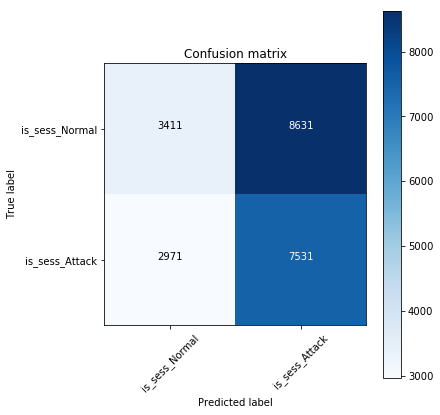

In [35]:
from sklearn.metrics import confusion_matrix
cm_2labels = confusion_matrix(y_pred = labels2_pred_vae_arr[:,0], y_true = labels2_pred_vae_arr[:,1])
plt.figure(figsize=[6,6])
plot_confusion_matrix(cm_2labels, output_columns_2labels, normalize = False)

Confusion matrix, without normalization
[[4461 7581    0    0    0]
 [3106 5165    0    0    0]
 [ 772 1265    0    0    0]
 [  65  118    0    0    0]
 [   1   10    0    0    0]]


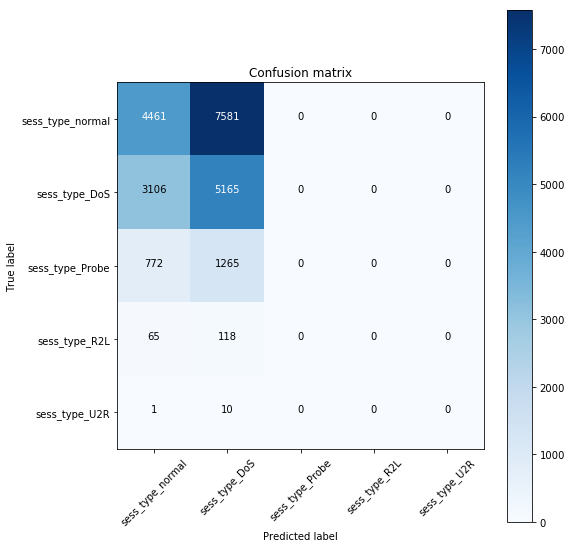

In [36]:
cm_5labels = confusion_matrix(y_pred = labels5_pred_vae_arr[:,0], y_true = labels5_pred_vae_arr[:,1])
plt.figure(figsize=[8,8])
plot_confusion_matrix(cm_5labels, output_columns_5labels, normalize = False)